In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

In [2]:
# PATHS

# get working directory
path_working = Path.cwd()

path_data_binary = str(path_working) + "\\" + "data" + "\\" + "binary" + "\\"

path_data_triple = str(path_working) + "\\" + "data" + "\\" + "triple" + "\\"

path_data_multiclass = str(path_working) + "\\" + "data" + "\\" + "multiclass" + "\\"

In [3]:
def create_dataframe (path):
    # Get the files from the path provided in the OP
    files = Path(path).glob('*.csv')  # .rglob to create iterator for subdirectories
    
    #Find all csv files in directory and concatenate them
    dfs = list()
    names = list()
    for file in files:
        data = pd.read_csv(file)
        # .stem is method for pathlib objects to get the filename without the extension
        # create another column in dataframe for filename
        data['file'] = file.stem
        names.append(file.stem)
        dfs.append(data)
    
    df = pd.concat(dfs, ignore_index=True)
    
    return df


In [4]:
df_raw_binary = create_dataframe(path_data_binary)

In [5]:
#drop last column taht shows csv filename source:
del df_raw_binary[df_raw_binary.columns[-1]]

df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4   marker  
0               0           0           0           0  Natural  
1               0           0           0           0  Natural  
2               0           0           0           0  Natural  
3               0           0           0           0  Natural  
4               0           0           0           0  Natural  
...           ...         ...         ...         ...      ...  
78372           0           0           0           0  Natural  
78373           0           0           0           0  Natural  
78374           0           0           0           0  Natural  
78375           0           0           0           0  Natural  
78376           0           0           0           0  Natural  

[78377 rows x 129 columns]

In [6]:
print(df_raw_binary.shape)

df_raw_binary['marker'].value_counts()

(78377, 129)


Attack     55663
Natural    22714
Name: marker, dtype: int64

In [7]:
#----> UNBALANCED DATA

In [8]:
# .copy() is very important otherwise its just a pointer
df = df_raw_binary.copy()

In [9]:
def marker_to_numeric_binary(x):
        if x=='Attack': return 0
        if x=='Natural': return 1
        
LABEL_MAP = {0 : "Attack", 1: "Natural"}

LABELNAMES = [LABEL_MAP[key] for key in LABEL_MAP]

df['marker'] = df['marker'].apply(marker_to_numeric_binary)
df

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4  marker  
0               0           0           0           0       1  
1               0           0           0           0       1  
2               0           0           0           0       1  
3               0           0           0           0       1  
4               0           0           0           0       1  
...           ...         ...         ...         ...     ...  
78372           0           0           0           0       1  
78373           0           0           0           0       1  
78374           0           0           0           0       1  
78375           0           0           0           0       1  
78376           0           0           0           0       1  

[78377 rows x 129 columns]

In [10]:
# Check for infinite float entries
# "np.finfo(np.float64).max" returns the maximum finite value that can be represented by a 64-bit floating point number
# "df.values >= np.finfo(np.float64).max" returns a bollean array where "np.finfo(np.float64).max" is checked
# "np.where(df.values >= np.finfo(np.float64).max)" returns a array of indices where "df.values >= np.finfo(np.float64).max" is true

np.where(df.values >= np.finfo(np.float64).max)

(array([  738,   739,   753, ..., 78352, 78353, 78353], dtype=int64),
 array([26, 26, 26, ..., 55, 26, 55], dtype=int64))

In [11]:
# Check for NaN values
np.isnan(df.values.any())

False

In [12]:
# Replace infinite updated data with nan

# "[np.inf, -np.inf]" specifies the values to be replaced
# "np.nan" specifies the value to replace the infinite values with.
# "inplace=True" modifies the Dataframe in place, so that the original df is updated the new values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

print(df.shape)

df['marker'].value_counts()

(72073, 129)


0    51445
1    20628
Name: marker, dtype: int64

### ----> Due to cleaning up NaNs and infinites we lost about 6000 datapoints, which is not very harmful due to the fact that there are still 72000 rows

In [13]:
y = df['marker']

X = df.drop(['marker'],axis =1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((43243, 128), (43243,), (14415, 128), (14415,), (14415, 128), (14415,))

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate cost complexity pruning path using validation datasets
path = clf.cost_complexity_pruning_path(X_val, y_val)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [16]:
def evaluate_model(model, X_test, y_test, labelmap, binarylabels = False):
    """
    Evaluate a multiclass classification model using various metrics.
    
    Args:
        model (sklearn estimator): The model to evaluate.
        X_test (pandas dataframe): The test features.
        y_test (pandas series): The true labels
        labelmap (dict): The encoding of the names of the labels that are passed to report and matrix
        binarylabels (bool): If True model was built out of a binary classification problem
        
    Returns:
        sklearn confusionmatrix , sklearn report, metrics
    """
    
    #THIS IS EXTREMELY IMPORTANT:
    # scikit learn sorts labels in ascending order, thus 0's are first column/row and 1's are the second one
    # this means also that 0's are positive class in the report as well as in the confusion matrix!
    # To be on the safe side, here the labels are given by labelmap, where "Attack" has the key 0! So "Attack" is positive class!
    
    labelnames = [labelmap[key] for key in labelmap]

    
    # Predict the test labels using the trained model
    y_pred = model.predict(X_test)
    
    # map encoded labels to original labels
    y_true = [labelmap[i] for i in y_test]
    y_pred = [labelmap[i] for i in y_pred]
    
    # Compute the confusion matrix and print it
    confusionmatrix = confusion_matrix(y_true, y_pred, labels=labelnames)
    print("Confusion matrix:")
    print(confusionmatrix)
    
    # Compute the classification report and print it
    report = classification_report(y_true, y_pred, target_names=labelnames)
    print("Classification report:")
    print(report)
    
    if binarylabels == True:
        # Calculate metrics out of confusion matrix to compare
        
        tp, fn, fp, tn = confusionmatrix.ravel() # here also important first row, first columns are 0 so positive class so tp

        #  0   1
        # 0 [tp, fn]
        # 1 [fp, tn]

        precision = tp / (tp+fp)
        recall = tp / (tp+fn)
        specificity = tn / (tn+fp)

        metrics = [precision, recall, specificity]
        
    else:
        metrics = None
    
    return confusionmatrix, report, metrics

In [17]:
cm, rp, mets = evaluate_model(clf, X_test, y_test, LABEL_MAP, True)

Confusion matrix:
[[9243 1066]
 [1069 3037]]
Classification report:
              precision    recall  f1-score   support

      Attack       0.90      0.90      0.90     10309
     Natural       0.74      0.74      0.74      4106

    accuracy                           0.85     14415
   macro avg       0.82      0.82      0.82     14415
weighted avg       0.85      0.85      0.85     14415



In [18]:
print(mets)

[0.8963343677269201, 0.8965952080706179, 0.7396492937165124]


<AxesSubplot:>

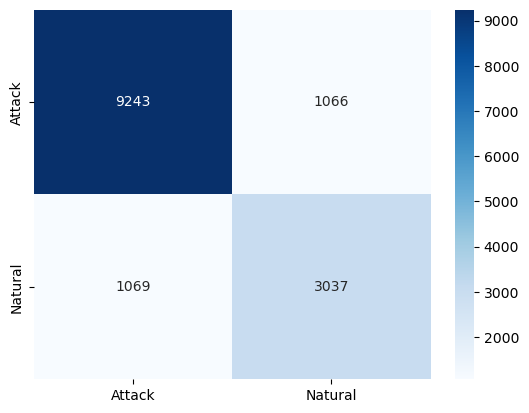

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELNAMES, yticklabels=LABELNAMES)

In [20]:
print(ccp_alphas)
print(len(ccp_alphas))

[0.00000000e+00 4.43981963e-05 4.44693473e-05 5.94618701e-05
 5.94618701e-05 6.07006590e-05 6.16641616e-05 6.24349636e-05
 6.24349636e-05 6.30656198e-05 6.30656198e-05 6.35911666e-05
 6.38954306e-05 6.47473696e-05 6.47473696e-05 6.47473696e-05
 6.50364204e-05 6.55181717e-05 6.55181717e-05 6.55181717e-05
 6.55181717e-05 6.55181717e-05 6.56223341e-05 6.57210143e-05
 6.57210143e-05 6.57210143e-05 6.57210143e-05 6.57210143e-05
 6.59035727e-05 6.59035727e-05 6.59035727e-05 6.59035727e-05
 6.60687445e-05 6.60687445e-05 6.62189008e-05 6.62189008e-05
 6.62189008e-05 6.62189008e-05 6.62189008e-05 6.62189008e-05
 6.62189008e-05 6.63116443e-05 6.63559999e-05 6.63559999e-05
 6.64816742e-05 6.64816742e-05 6.65972945e-05 6.67040209e-05
 6.68028417e-05 6.68946038e-05 6.68946038e-05 6.68946038e-05
 6.68946038e-05 6.69800376e-05 6.69800376e-05 6.70597757e-05
 6.70597757e-05 6.71343694e-05 6.71343694e-05 6.72043011e-05
 6.72376531e-05 6.73318235e-05 6.73318235e-05 6.73901194e-05
 6.74451767e-05 6.744517

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

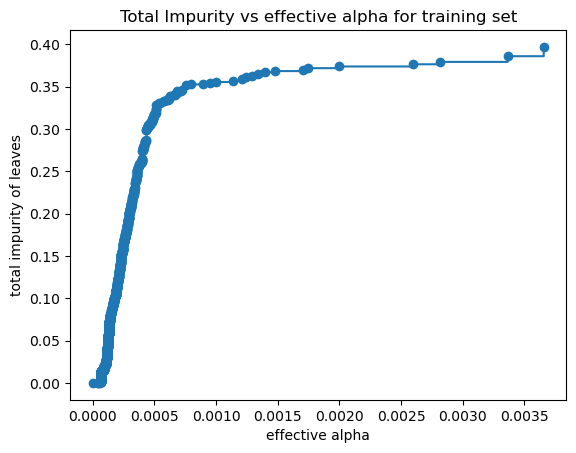

In [21]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [22]:
# To reduce computing time a cap is chosen

ccp_alphas_filtered = [x for x in ccp_alphas if x >= 0.0005]

print(ccp_alphas_filtered)
print(len(ccp_alphas_filtered))

[0.0005066376477065523, 0.0005106693316675043, 0.0005124673296422631, 0.0005124851619933205, 0.0005152075341134025, 0.0005162788211330446, 0.0005221215791491674, 0.0005359740835566432, 0.0005422358942020087, 0.0005788171608061138, 0.0005811488046229157, 0.0005975723622782447, 0.0006060887255045664, 0.0006094185501292866, 0.0006147838091511089, 0.0006159085451489196, 0.0006233666719623497, 0.0006243496357960453, 0.0006353983505930621, 0.0006640176970864487, 0.0006667781532949083, 0.0006824229588167733, 0.00068337178493438, 0.0007111451639343781, 0.0007254685228481779, 0.0007527461356123839, 0.0007996312366859784, 0.0008956705626373832, 0.0009497277570674721, 0.001000545857217379, 0.001138231023843632, 0.0012061992071740746, 0.0012381419418629226, 0.0012901912248995534, 0.001340563255430794, 0.0013989579496025521, 0.0014783806753701154, 0.0017068520609382076, 0.0017440448278358348, 0.0019928661773408393, 0.00259252595378294, 0.0028175790249059182, 0.0033643448609213117, 0.003656439908689

In [23]:
clfs = []
for ccp_alpha in ccp_alphas_filtered:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_val, y_val)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas_filtered[-1]
    )
)

Number of nodes in the last tree is: 7 with ccp_alpha: 0.004218326627310938


In [24]:
print(len(clfs))

45


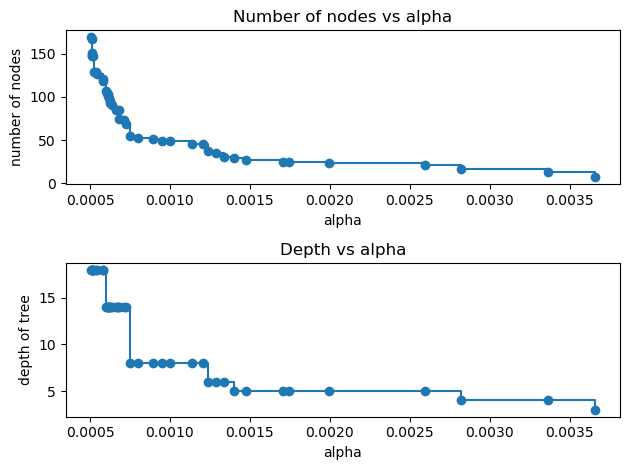

In [25]:
clfs = clfs[:-1]
ccp_alphas_filtered = ccp_alphas_filtered[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_filtered, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_filtered, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

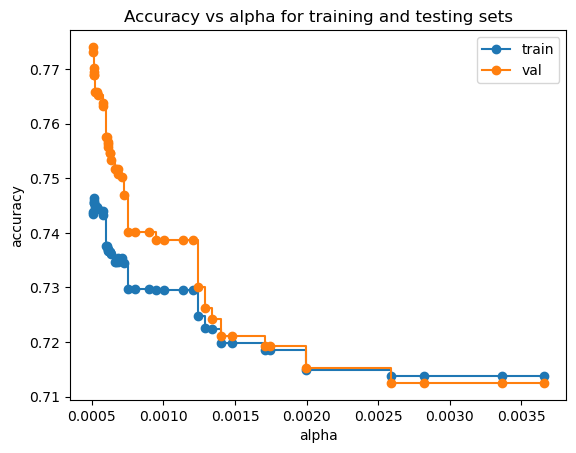

In [26]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
validation_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_filtered, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_filtered, validation_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()